## Дипломная работа по теме "Анализ продаж велосипедов (поиск инсайтов, составление рекомендаций стейкхолдерам)"

In [ ]:
# Подключение необходимых библиотек для работы.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузка датасета с данными.
df = pd.read_csv('bike_sales_100k.csv')
df.head()

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female


In [ ]:
# Проверка типов данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_ID          100000 non-null  int64  
 1   Date             100000 non-null  object 
 2   Customer_ID      100000 non-null  int64  
 3   Bike_Model       100000 non-null  object 
 4   Price            100000 non-null  float64
 5   Quantity         100000 non-null  int64  
 6   Store_Location   100000 non-null  object 
 7   Salesperson_ID   100000 non-null  int64  
 8   Payment_Method   100000 non-null  object 
 9   Customer_Age     100000 non-null  int64  
 10  Customer_Gender  100000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.4+ MB


## Описание исходного датасета и типов данных

Sale_ID - Уникальный идентификатор для каждой продажи (формат int64)

Date - Дата продажи в формате ДД-ММ-ГГГГ (формат object)

Customer_ID - Уникальный идентификатор для каждого клиента (формат int64)

Bike_Model - Модель проданного велосипеда (формат object)

Price - Цена проданного велосипеда (формат float64)

Quantity - Количество велосипедов, проданных в транзакции (формат int64)

Store_Location - Местоположение велосипеда, где была произведена продажа(формат object)  

Salesperson_ID - Уникальный идентификатор продавца (формат int64)

Payment_Method - Используемый метод оплаты (формат object)

Customer_Age - Возраст клиента(формат int64)  

Customer_Gender - Пол клиента (формат object)  

In [ ]:
# Проверка данных на наличие пропусков.
df.isnull().sum()

,0
Sale_ID,0
Date,0
Customer_ID,0
Bike_Model,0
Price,0
Quantity,0
Store_Location,0
Salesperson_ID,0
Payment_Method,0
Customer_Age,0


In [ ]:
# Проверка на наличие дубликатов.
df.duplicated().sum()

0

In [ ]:
# Проверка возраста покупателей на наличие аномалий.
df['Customer_Age'].describe()

,Customer_Age
count,100000.000000
mean,44.043410
std,15.313761
min,18.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,70.000000


In [ ]:
# Приведение названий столбцов к нижнему регистру.
df.columns = df.columns.str.lower()
df.head()

,sale_id,date,customer_id,bike_model,price,quantity,store_location,salesperson_id,payment_method,customer_age,customer_gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female


In [ ]:
# Приведение формата столбца "date" к общему системному формату.
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
df.head()

,sale_id,date,customer_id,bike_model,price,quantity,store_location,salesperson_id,payment_method,customer_age,customer_gender
0,1,2022-07-11,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,2024-05-03,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,2022-09-01,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,2022-09-28,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,2021-01-05,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female


In [ ]:

df_best_model = df[['bike_model', 'quantity']]  #выделяем нужные столбцы.

grouped_df = df_best_model.groupby('bike_model')['quantity'].sum().reset_index()  #группировка по модели велосипеда и находим общее количество.

grouped_df.head()

,bike_model,quantity
0,BMX,43080
1,Cruiser,43120
2,Electric Bike,42249
3,Folding Bike,42872
4,Hybrid Bike,43089


In [ ]:
grouped_df = grouped_df.sort_values(by='quantity', ascending=False) #сортировка по количеству проданных моделей.
grouped_df.head(10)

,bike_model,quantity
1,Cruiser,43120
4,Hybrid Bike,43089
0,BMX,43080
6,Road Bike,43022
3,Folding Bike,42872
5,Mountain Bike,42279
2,Electric Bike,42249


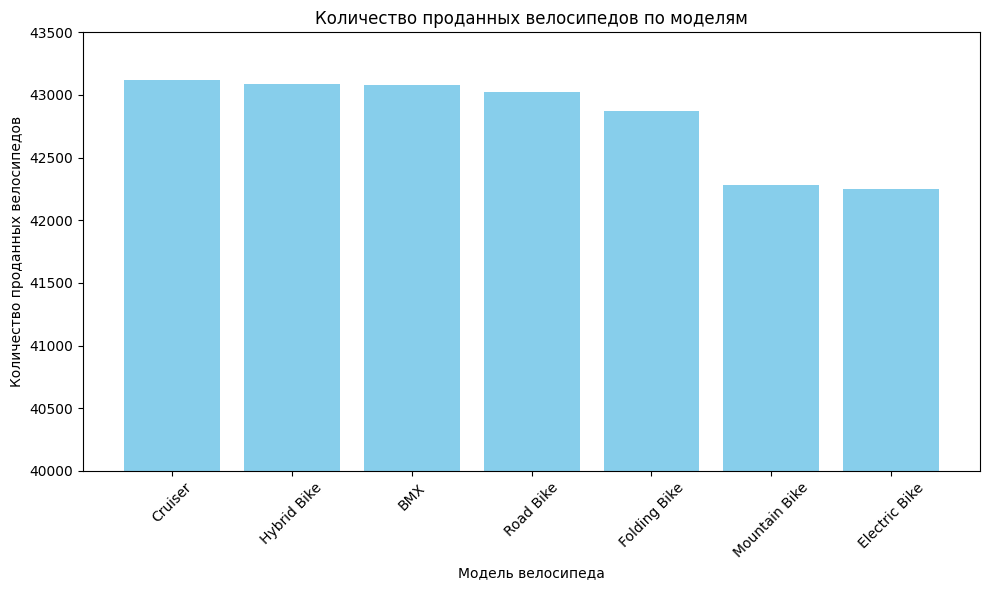

In [ ]:
# построение диаграммы по количеству проданных велосипедов.
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['bike_model'], grouped_df['quantity'], color='skyblue')
plt.ylim(40000, 43500)
plt.xlabel('Модель велосипеда')
plt.ylabel('Количество проданных велосипедов')
plt.title('Количество проданных велосипедов по моделям')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Вывод:
Все представленные в магазинах модели велосипедов пользуются примерно одинаковым спросом, самые низкие продажи среди велосипедов с электрическим приводом, самая популярная модель – прогулочный велосипед.

In [ ]:
#средняя цена модели велосипеда.
df_bike_price = df[['bike_model', 'price']]

avg_price = df_bike_price.groupby('bike_model')['price'].mean().reset_index().sort_values(by='price', ascending=False)

avg_price.head(10)


,bike_model,price
0,BMX,2608.601366
4,Hybrid Bike,2601.903076
6,Road Bike,2600.953834
2,Electric Bike,2598.046912
1,Cruiser,2596.130548
5,Mountain Bike,2591.299473
3,Folding Bike,2590.196490


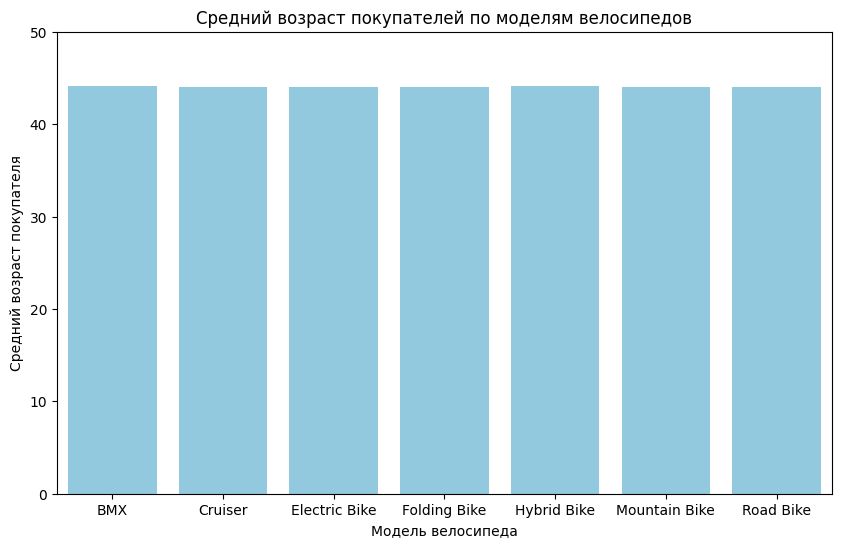

In [ ]:
#поиск зависимости между типом велосипеда и возрастом покупателя.
df_model_age = df[['bike_model', 'customer_age']]

grouped_df_model_age = df_model_age.groupby('bike_model')['customer_age'].mean().reset_index() #групировка данных по модели велосипеда и вычисление среднего возраста покупателей.

plt.figure(figsize=(10, 6))
sns.barplot(x='bike_model', y='customer_age', data =grouped_df_model_age, color='skyblue')
plt.ylim(0, 50)
plt.title('Средний возраст покупателей по моделям велосипедов')
plt.xlabel('Модель велосипеда')
plt.ylabel('Средний возраст покупателя')
plt.show()



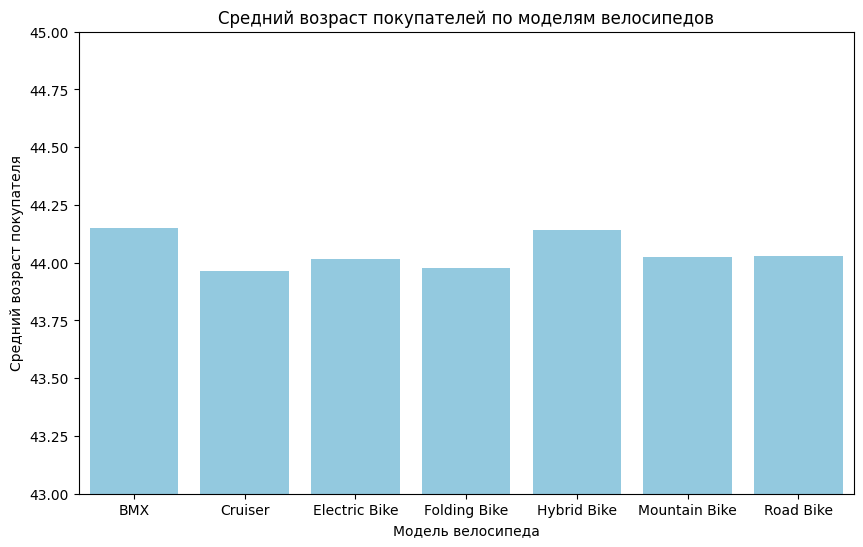

In [ ]:
#делаем отсчет от 43 лет по оси y для более понятного различия.
plt.figure(figsize=(10, 6))
sns.barplot(x='bike_model', y='customer_age', data =grouped_df_model_age, color='skyblue')
plt.ylim(43, 45)
plt.title('Средний возраст покупателей по моделям велосипедов')
plt.xlabel('Модель велосипеда')
plt.ylabel('Средний возраст покупателя')
plt.show()

##Вывод:
Согласно представленной визуализации можно сделать вывод, что средний возраст покупателей каждой модели примерно одинаков, соответственно возраст покупателя особо не влияет на выбор модели велосипеда.

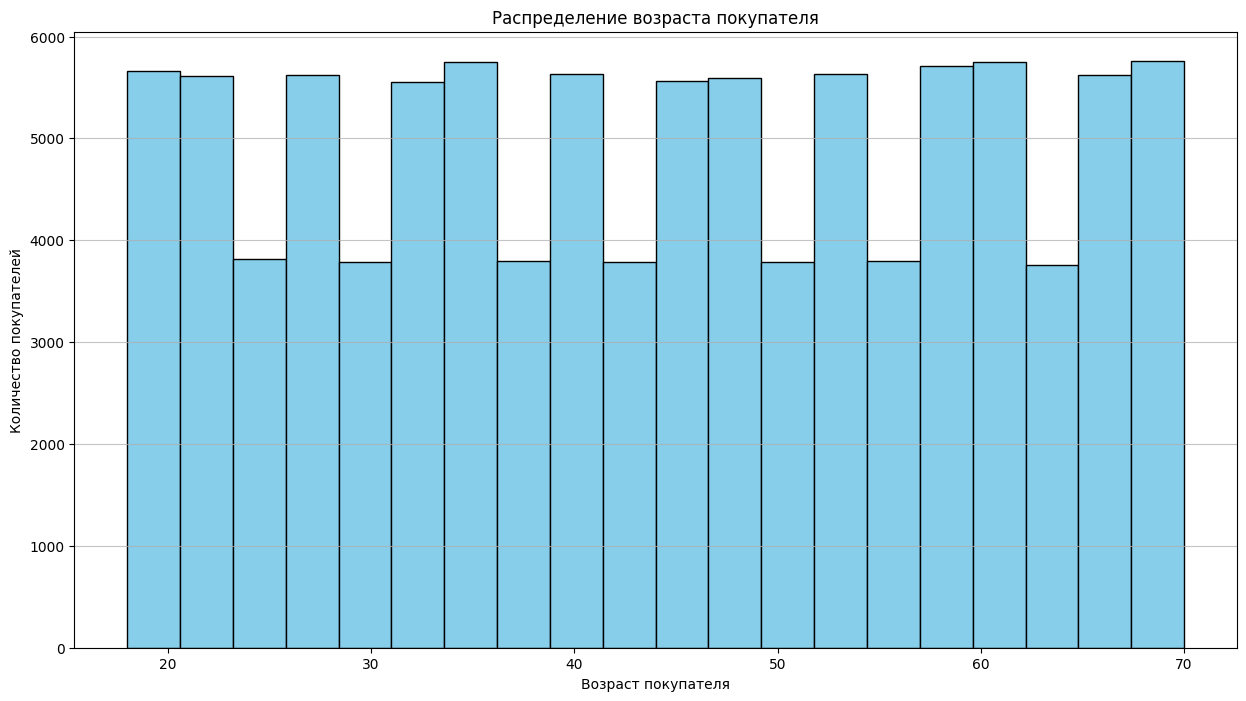

In [ ]:
#визуалзиция распределения возраста покупателей.
plt.figure(figsize=(15, 8))
plt.hist(df['customer_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста покупателя')
plt.xlabel('Возраст покупателя')
plt.ylabel('Количество покупателей')
plt.grid(axis='y', alpha=0.75)
plt.show()

##Вывод:
Распределение данных равномерное, люди всех возрастов примерно одинаково покупают велосипеды.

<ipython-input-28-62272ce32800>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quan_month['date'] = pd.to_datetime(df_quan_month['date']) #преобразование в объект datetime
<ipython-input-28-62272ce32800>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quan_month['month'] = df_quan_month['date'].dt.month_name() #создание нового столбца с месяцем


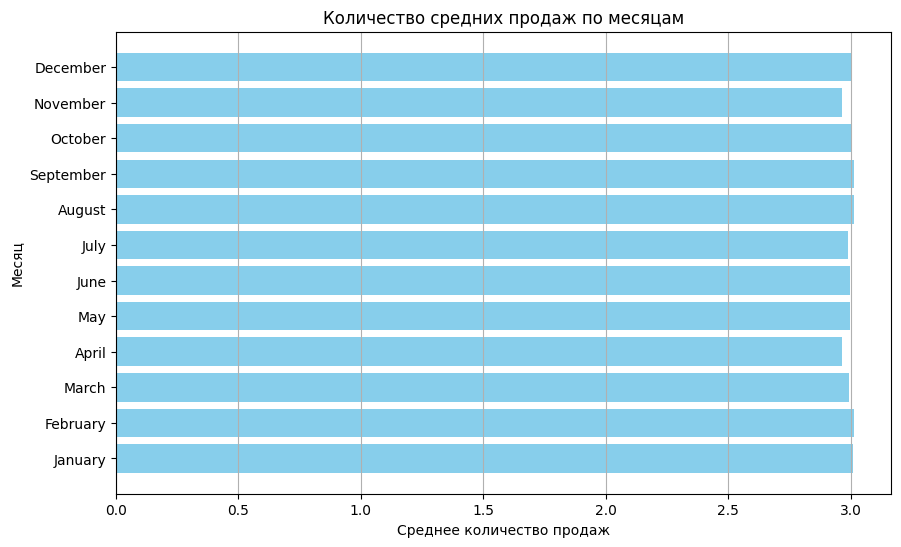

In [ ]:
#Определение месяца с наибольшим количеством продаж.

df_quan_month = df[['date', 'quantity']]

df_quan_month['date'] = pd.to_datetime(df_quan_month['date']) #преобразование в объект типа datetime.

df_quan_month['month'] = df_quan_month['date'].dt.month_name() #создание нового столбца с месяцем.

grouped_month = df_quan_month.groupby('month')['quantity'].mean().reindex(
     ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    ).reset_index() #группировка по месяцу и расчет среднего по продажам.


plt.figure(figsize=(10, 6))
plt.barh(grouped_month['month'], grouped_month['quantity'], color='skyblue')
plt.title('Количество средних продаж по месяцам')
plt.xlabel('Среднее количество продаж')
plt.ylabel('Месяц')
plt.grid(axis='x')
plt.show()


In [ ]:
grouped_month.head(12).sort_values(by='quantity', ascending=False)

,month,quantity
8,September,3.014016
7,August,3.014006
1,February,3.013769
0,January,3.007662
11,December,3.005554
9,October,3.002243
4,May,2.997664
5,June,2.995409
2,March,2.992429
6,July,2.990563


##Вывод:
Самый лучший месяц по продажам – сентябрь. Существенное отличие количества продаж по месяцам отсутствует.

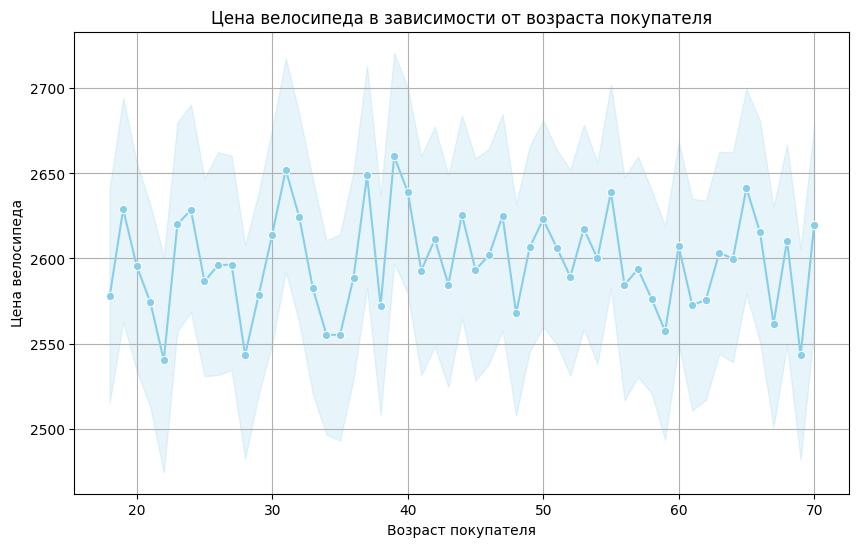

In [ ]:
# Построение визуализации для отражения зависимости возраста покупателя от цены велосипеда.

df_age_price = df[['customer_age', 'price']]

sorted_df = df_age_price.sort_values('customer_age')

plt.figure(figsize=(10, 6))
sns.lineplot(x='customer_age', y='price', data=sorted_df, marker='o', color='skyblue')
plt.title('Цена велосипеда в зависимости от возраста покупателя')
plt.xlabel('Возраст покупателя')
plt.ylabel('Цена велосипеда')
plt.grid()
plt.show()

In [ ]:
#Средняя, максимальная и минимальная цена велосипеда (по всем моделям).

avg_price_all = round(df['price'].mean(), 2)

min_price_all = round(df['price'].min(), 2)

max_price_all = round(df['price'].max(), 2)

print(f"Средняя цена велосипеда по всем моделям: {avg_price_all}, минимальня: {min_price_all}, максимальная: {max_price_all}")

Средняя цена велосипеда по всем моделям: 2598.18, минимальня: 200.01, максимальная: 4999.81


##Вывод:
Согласно представленной визуализации, можно отметить, что, в основном, дорогие велосипеды покупают люди до 40 лет, но также эта категория людей приобретает и самые дешевые модели. Люди в интервале от 40 до 55 лет приобретают велосипеды по средней цене. В целом, во всех возрастных интервалах наблюдаются покупки как дорогих, так и дешевых моделей велосипедов.

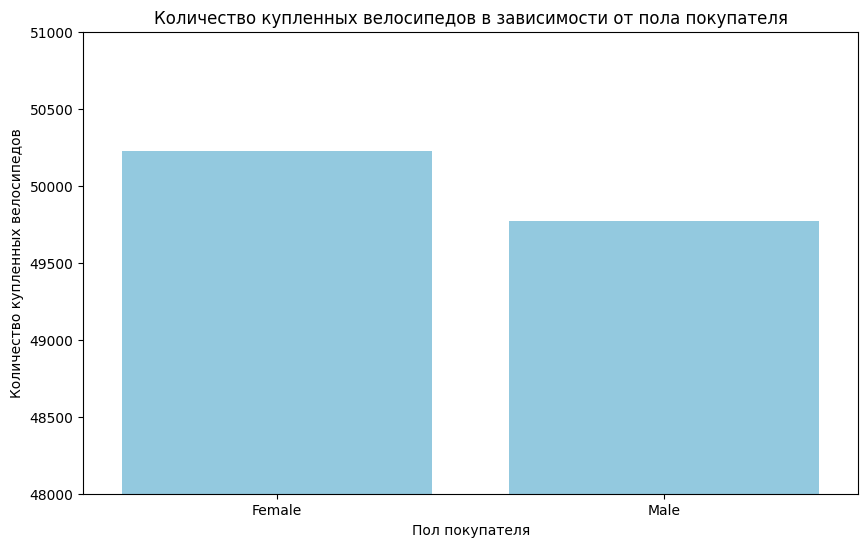

In [ ]:
# Построение визуализации для отражении зависимости пола покупателя от количества купленных велосипедов.

df_gender_count = df[['customer_gender', 'quantity']]

plt.figure(figsize=(10, 6))
plt.ylim(48000, 51000)
sns.countplot(x='customer_gender', data=df_gender_count, color='skyblue')
plt.title('Количество купленных велосипедов в зависимости от пола покупателя')
plt.xlabel('Пол покупателя')
plt.ylabel('Количество купленных велосипедов')
plt.show()




##Вывод:
Количество покупателей-женщин незначительно превышает количество покупателей-мужчин. В принципе можно сказать, что пол покупателя практически не влияет на количество покупаемых велосипедов.

<ipython-input-48-4a5142c8be30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay_quan['payment_method'] = df_pay_quan['payment_method'].astype('category').cat.codes # преобразование в числовой формат столбца с методом оплаты


Корреляция между payment_method и quantity: -0.001636722287174555


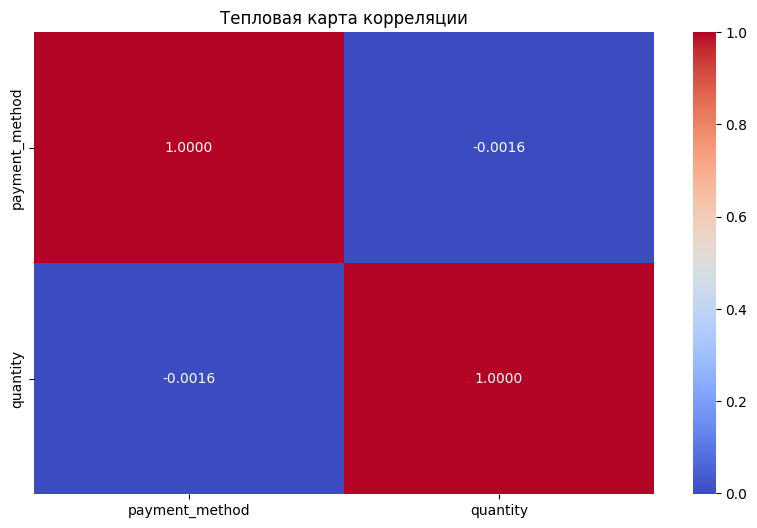

In [ ]:
# Корреляция между методом оплаты и количеством продаж.
df_pay_quan = df[['payment_method', 'quantity']]

df_pay_quan['payment_method'] = df_pay_quan['payment_method'].astype('category').cat.codes # преобразование в числовой формат столбца с методом оплаты.

correlation = df_pay_quan.corr()

print("Корреляция между payment_method и quantity:", correlation['payment_method']['quantity'])

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Тепловая карта корреляции')
plt.show()

##Вывод:
В матрице корреляции представлены две переменные: payment_method (способ оплаты) и quantity (количество купленных велосипедов). Учитывая получившееся значение -0,0016 можно сказать, что между методом оплаты и количеством покупок нет явной линейной зависимости. На визуализации красные цвета соответствуют высоким значениям корреляции, а синие - низким.

#Заключение и итоги

Согласно проведенному анализу в сети магазинов по продажам велосипедов наблюдается стабильный спрос на все виды моделей велосипедов, самые популярные модели - прогулочные, гибридные, BMX. Велосипеды пользуются спросом у покупателей всех возрастов.  Наиболее популярный месяц по покупкам велосипедов в разрезе нескольких лет – сентябрь, но в целом продажи происходят равномерно в течение всего года. На основе анализа было установлено, что высокий ценник на модели велосипедов не смущает молодых людей (одна из популярных, а также самая дорогая, моделей велосипедов BMX пользуется спросом именно у молодых – т.к. модель предназначена для выполнения трюков), но также достаточное количество людей в возрасте до 40 лет предпочитают приобретать недорогие стандартные модели велосипедов для обычного катания. Люди среднего возраста в интервале от 40 до 60 лет обычно имеют более высокую платежеспособность и более требовательны к трате денежных средств, поэтому выбирают средние по цене модели, которые гарантируют долговечность, качество и комфорт в управлении. Так же был приведен пример визуализации показывающий, что среди покупателей нет явных отличий между мужчинами и женщинами, все примерно одинаково готовы приобретать велосипеды. В итоге было показано, что покупателям не принципиально какой метод оплаты присутствует в нашей сети магазинов, все основные методы уже используются, какие-то дополнительные внедрять не имеет смысла.

Общие рекомендации согласно проведенному анализу:
В нашей сети магазинов по продажам велосипедов наблюдается стабильный спрос на различные модели велосипедов людьми всех возрастов. Исходя из этого рекомендуется рассмотреть вопрос о расширении сети магазинов и открытии новых филиалов. Необходимо разработать рекламные материалы для разных возрастных категорий покупателей для успешного таргетинга. Хотя спрос на велосипеды стабилен, необходимо постоянно повышать уровень качества предоставления услуг клиентам, проверять производителей велосипедов перед закупками новых моделей, поддерживать уровень сервиса на высшем уровне.
